In [12]:
import mat_data_loader 
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [50]:
#Load the data for visualization
datafolder_name = ["OUTPUT","discrete_symmetric_p40_n100"]
#datafolder_name = ["OUTPUT","output 06-May-2024 21-21-34"]

data_path = os.path.join(*datafolder_name)
print(data_path)

data = mat_data_loader.load_mat_data(data_path)

OUTPUT\discrete_symmetric_p40_n100
Data loaded in 67.12 seconds.


In [72]:
#Design parameter extraction
designs = np.array(data['designs'])
design_params = np.array(data['design_params'])
n_designs = designs.shape[0]
n_panes = designs.shape[1]
design_res = designs.shape[2]

#Wavevector data extraction
WAVEVECTOR_DATA = data['WAVEVECTOR_DATA']
n_dim = WAVEVECTOR_DATA.shape[1]
WAVEVECTOR_DATA = WAVEVECTOR_DATA.reshape(n_designs, -1, 2)
n_wavevectors = WAVEVECTOR_DATA.shape[1]

#Eigenmode data extraction
EIGENVALUE_DATA = np.array(data['EIGENVALUE_DATA']).reshape(n_designs, n_wavevectors, -1)
n_bands = EIGENVALUE_DATA.shape[2]
EIGENVECTOR_DATA = np.array(data['EIGENVECTOR_DATA']).reshape(n_designs, n_wavevectors, n_bands, -1)
# EIGENVECTOR_DATA_real = np.real(EIGENVECTOR_DATA)
# EIGENVECTOR_DATA_imag = np.imag(EIGENVECTOR_DATA)
EIGENVECTOR_DATA_xy = EIGENVECTOR_DATA.reshape(n_designs, n_wavevectors, n_bands, n_dim, design_res,design_res)
EIGENVECTOR_DATA_x = EIGENVECTOR_DATA_xy[:, :, :, 0]
EIGENVECTOR_DATA_y = EIGENVECTOR_DATA_xy[:, :, :, 0]

#Constant data extraction
const = {key: np.array(data['const'][key]) for key in data['const']}
N_struct = data['N_struct']  # Adjust indexing if necessary
imag_tol = data['imag_tol']
rng_seed_offset = data['rng_seed_offset']

#Print the shape of each variable
print(f'n_designs: {n_designs}, n_panes: {n_panes}, design_res: {design_res}, d_design: {n_dim}, dispersion_bands: {n_bands}, rng_seed_offset: {rng_seed_offset}')
print('EIGENVALUE_DATA shape:', EIGENVALUE_DATA.shape)
print('EIGENVECTOR_DATA shape:', EIGENVECTOR_DATA.shape)
print('EIGENVECTOR_DATA_xy shape:', EIGENVECTOR_DATA_xy.shape)
print('WAVEVECTOR_DATA shape:', WAVEVECTOR_DATA.shape)
print('designs shape:', designs.shape)
print('design_params shape:', design_params.shape)
print('const shape:', {key: const[key].shape for key in const})

n_designs: 100, n_panes: 3, design_res: 32, d_design: 2, dispersion_bands: 6, rng_seed_offset: [[0.]]
EIGENVALUE_DATA shape: (100, 325, 6)
EIGENVECTOR_DATA shape: (100, 325, 6, 2048)
EIGENVECTOR_DATA_xy shape: (100, 325, 6, 2, 32, 32)
WAVEVECTOR_DATA shape: (100, 325, 2)
designs shape: (100, 3, 32, 32)
design_params shape: (1, 6)
const shape: {'E_max': (1, 1), 'E_min': (1, 1), 'N_eig': (1, 1), 'N_ele': (1, 1), 'N_pix': (1, 1), 'N_wv': (2, 1), 'a': (1, 1), 'design': (3, 32, 32), 'design_scale': (6, 1), 'isSaveEigenvectors': (1, 1), 'isUseGPU': (1, 1), 'isUseImprovement': (1, 1), 'isUseParallel': (1, 1), 'isUseSecondImprovement': (1, 1), 'poisson_max': (1, 1), 'poisson_min': (1, 1), 'rho_max': (1, 1), 'rho_min': (1, 1), 'sigma_eig': (1, 1), 'symmetry_type': (4, 1), 't': (1, 1), 'wavevectors': (2, 325)}


In [78]:
i_design = 0
i_wavevector = 1
i_band = 2
i_dim = 3
i_res = 4
#Print a sample value of each variable
# print('EIGENVALUE_DATA:', EIGENVALUE_DATA[0])
# print('EIGENVECTOR_DATA:', EIGENVECTOR_DATA[0])
# print('WAVEVECTOR_DATA:', WAVEVECTOR_DATA[0])
# print('designs:', designs[0])

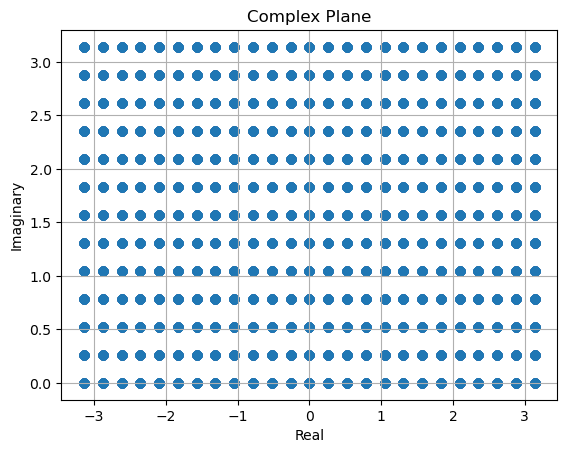

In [53]:
#View distribution of wavevectors in 2D plane
fig, ax = plt.subplots()
ax.scatter(WAVEVECTOR_DATA[:,0].reshape(-1), WAVEVECTOR_DATA[:,1].reshape(-1))
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Complex Plane')
ax.grid(True)
plt.show()

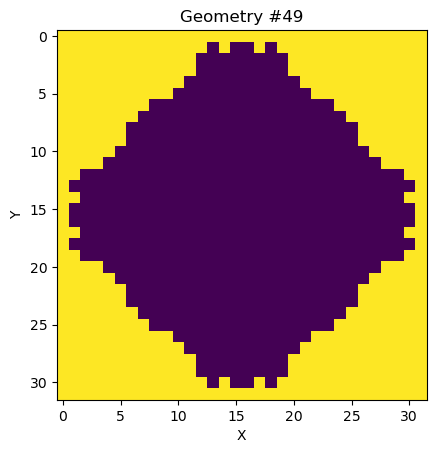

49


In [81]:
#View a geometry design alongside x and y displacement fields (eigenvectors) 
random_seed = 0
random.seed(random_seed)
sample_index = random.randint(0,100)
sample_geometry = designs[sample_index,0,:,:]
fig, ax = plt.subplots()
im = ax.imshow(sample_geometry)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Geometry #{sample_index}')
plt.show()

print(sample_index)
#sample_geometry

TypeError: Invalid shape (100, 325, 6, 32, 32) for image data

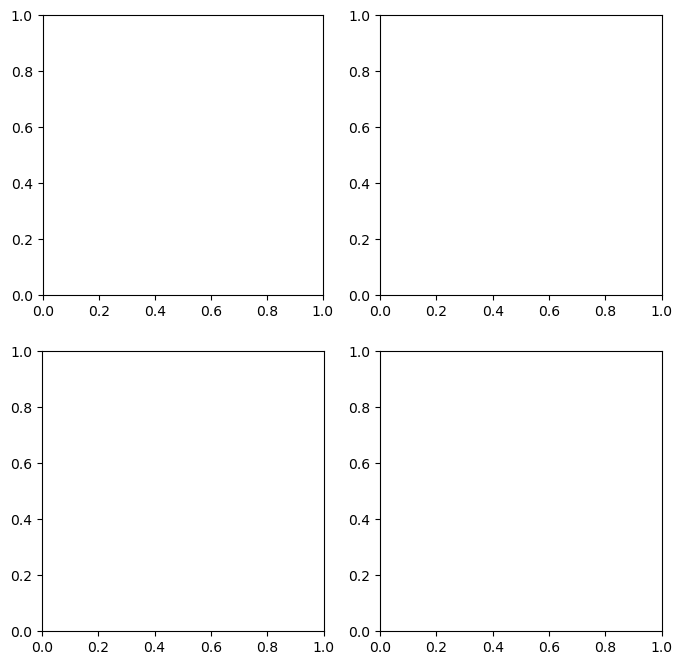

In [73]:
sample_band = random.randint(0,n_bands)
sample_wavevector = random.randint(0,n_wavevectors)
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')
sample_eigenvector_x = EIGENVECTOR_DATA_x[sample_index,0,0].reshape(design_res,design_res)

# Create a figure and a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot the real values of EIGENVECTOR_DATA_x in the top left pane
axs[0, 0].imshow(np.real(EIGENVECTOR_DATA_x), cmap='viridis')
axs[0, 0].set_title('x displacement field real')
axs[0, 0].axis('off')

# Plot the imaginary values of EIGENVECTOR_DATA_x in the bottom left pane
axs[1, 0].imshow(np.imag(EIGENVECTOR_DATA_x), cmap='viridis')
axs[1, 0].set_title('x displacement field imag')
axs[1, 0].axis('off')

# Plot the real values of EIGENVECTOR_DATA_y in the top right pane
axs[0, 1].imshow(np.real(EIGENVECTOR_DATA_y), cmap='viridis')
axs[0, 1].set_title('y displacement field real')
axs[0, 1].axis('off')

# Plot the imaginary values of EIGENVECTOR_DATA_y in the bottom right pane
axs[1, 1].imshow(np.imag(EIGENVECTOR_DATA_y), cmap='viridis')
axs[1, 1].set_title('y displacement field imag')
axs[1, 1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()